<a href="https://colab.research.google.com/github/lflambert/heartdiseaseprediction/blob/master/HeartdiseasetensorflowDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description
Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Content

Attribute Information:
> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

Acknowledgements
Creators:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.


In [0]:
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (3).csv


In [0]:
import io
data2 = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
#EDA

import seaborn as sns
%matplotlib inline


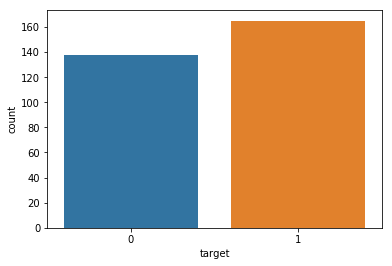

In [8]:
sns.countplot(x='target',data=data2)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


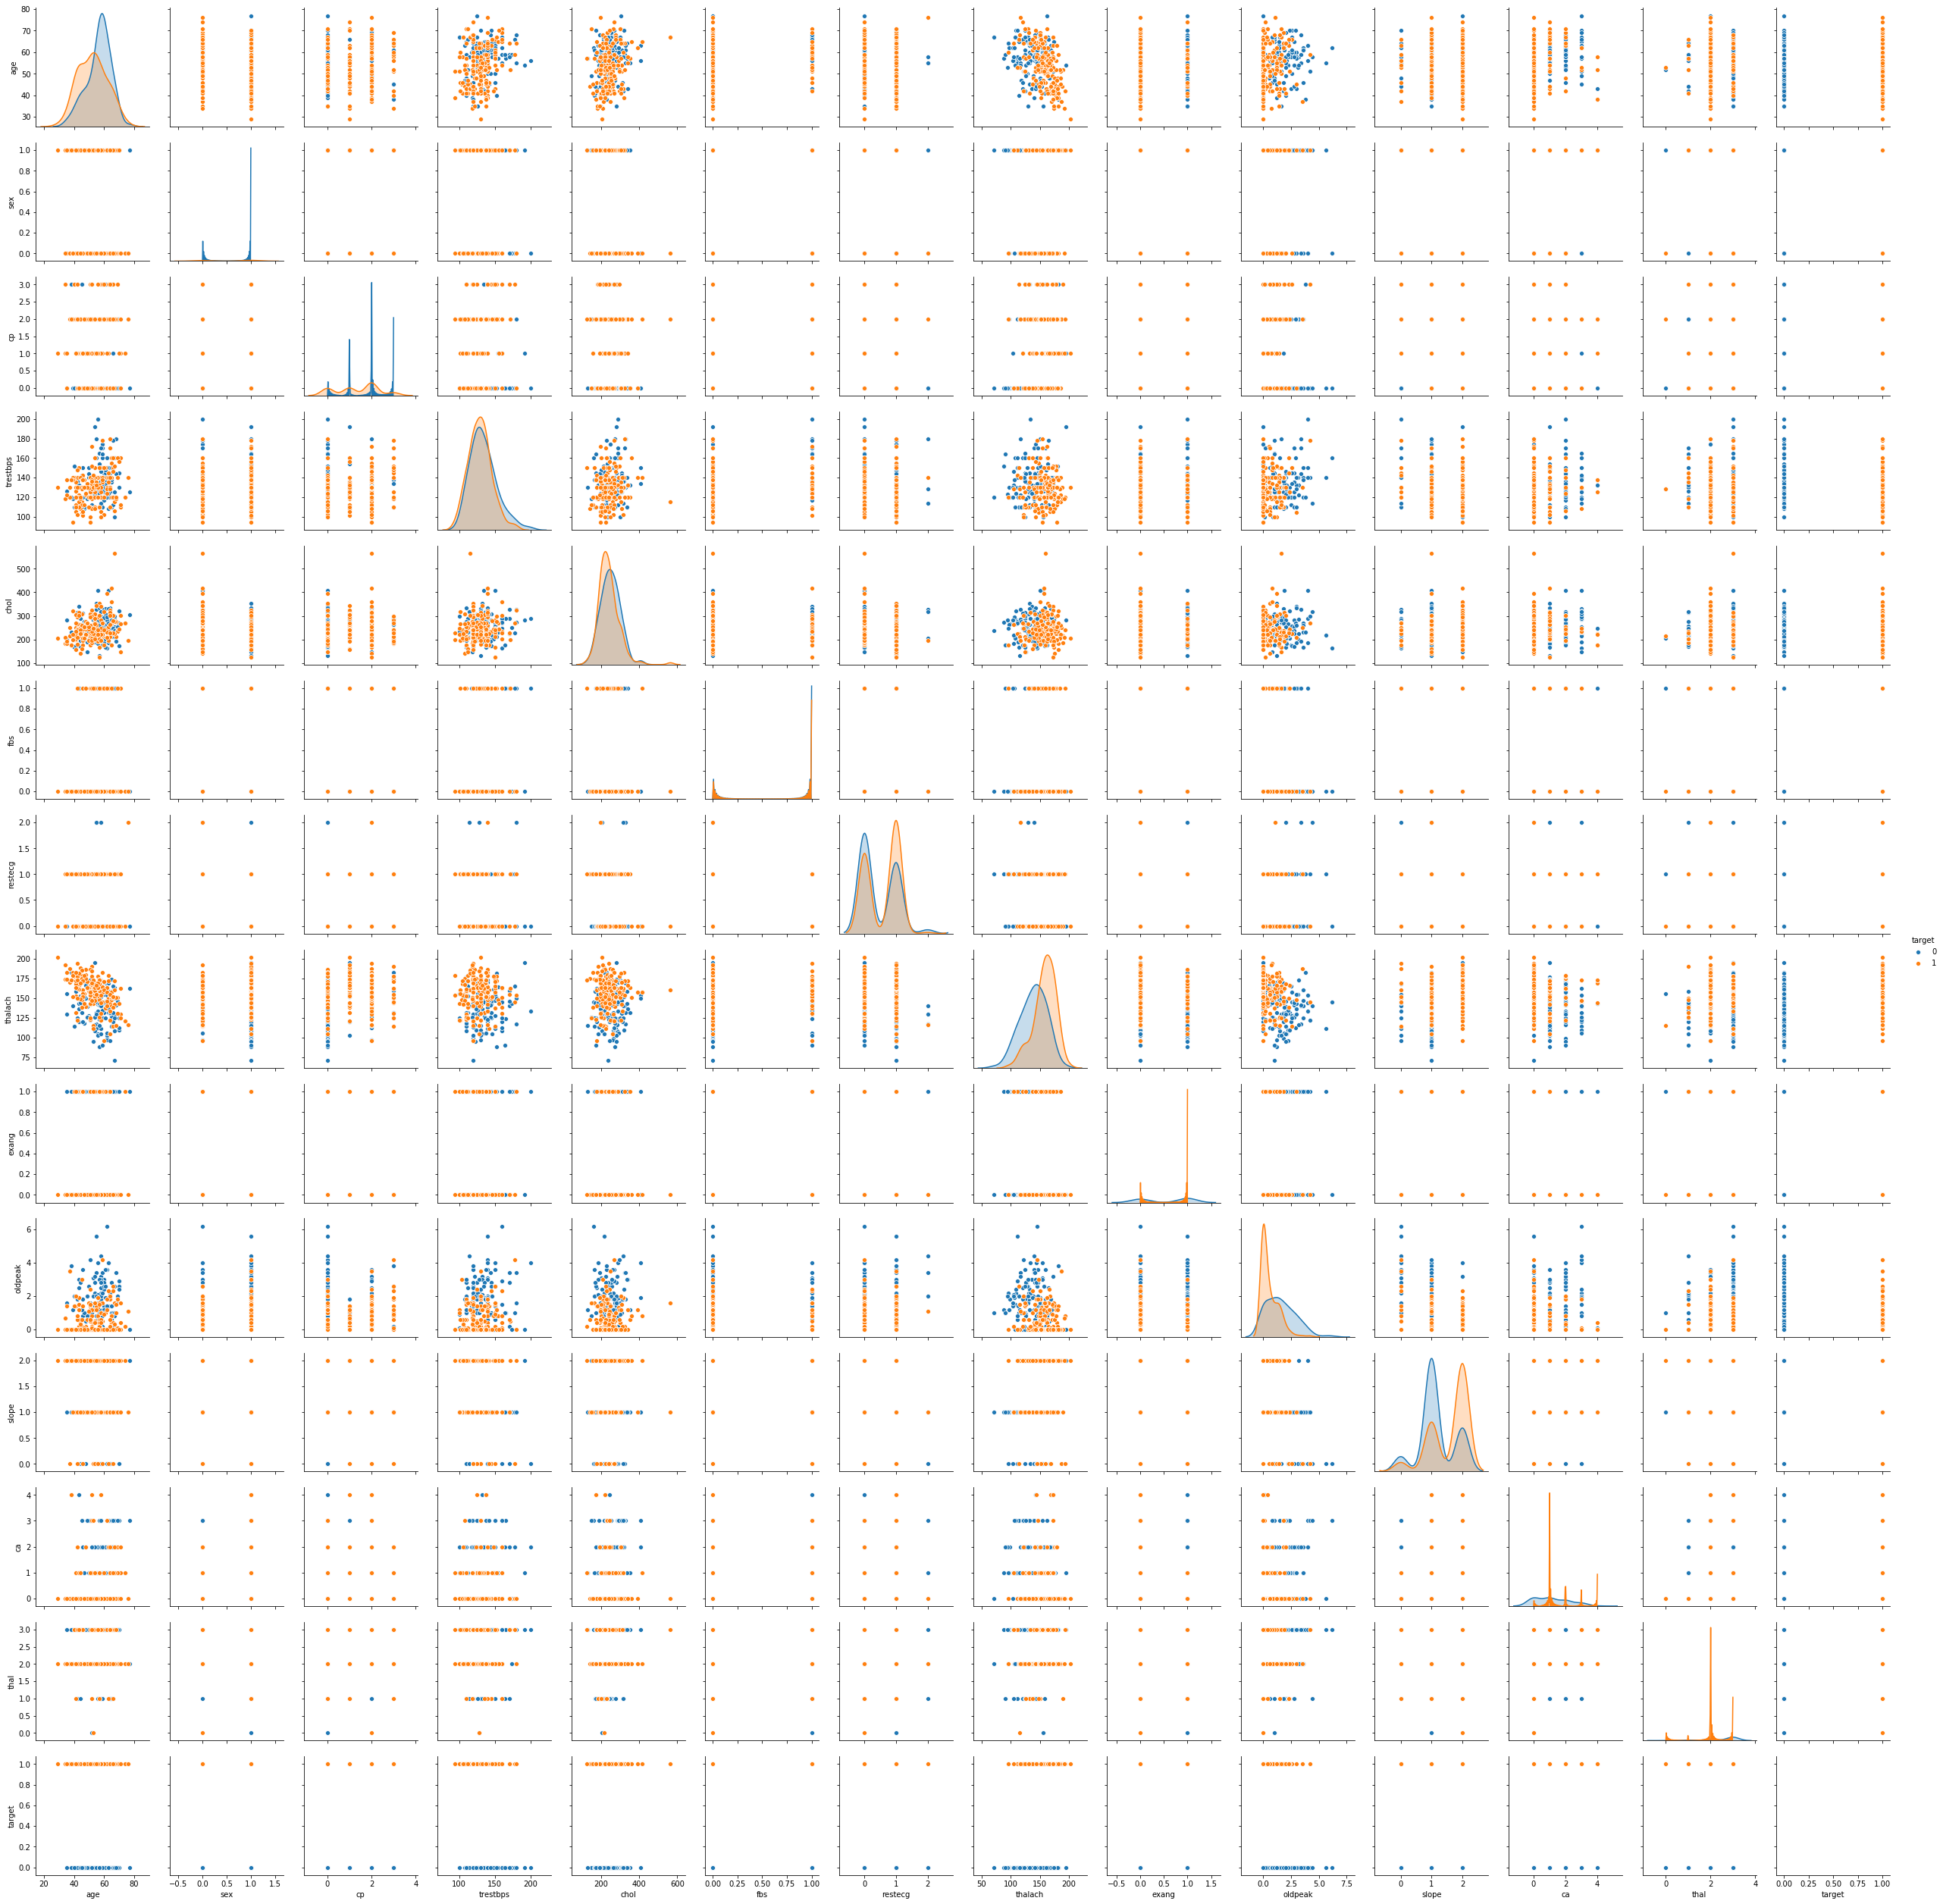

In [9]:
sns.pairplot(data2,hue='target')

In [0]:
#Data Preparation

#Standard Scaling

from sklearn.preprocessing import StandardScaler

In [0]:
#Create a StandardScaler() object called scaler
scaler = StandardScaler()

In [12]:
#Fit scaler to the features

scaler.fit(data2.drop('target',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
#Use the .transform() method to transform the features to a scaled version

scaled_features = scaler.fit_transform(data2.drop('target',axis=1))

In [14]:

#Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.

data_df = pd.DataFrame(scaled_features,columns=data2.columns[:-1])
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [0]:
#Train Test Split
#** Create two objects X and y which are the scaled feature values and labels respectively.**

X = data_df


In [0]:
y = data2['target']

In [0]:
# Use SciKit Learn to create training and testing sets of the data

from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
#TENSORFLOW

import tensorflow as tf

In [20]:
 #Create a list of feature column objects using tf.feature.numeric_column() 
  
data_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [0]:
age = tf.feature_column.numeric_column('age')
sex = tf.feature_column.numeric_column('sex')
cp = tf.feature_column.numeric_column('cp')
trestbps = tf.feature_column.numeric_column('trestbps')
chol = tf.feature_column.numeric_column('chol')
fbs = tf.feature_column.numeric_column('fbs')
restecg = tf.feature_column.numeric_column('restecg')
thalach =tf.feature_column.numeric_column('thalach')
exang =tf.feature_column.numeric_column('exang')
oldpeak = tf.feature_column.numeric_column('oldpeak')
slope = tf.feature_column.numeric_column('slope')
ca = tf.feature_column.numeric_column('ca')
thal =tf.feature_column.numeric_column('thal')

In [0]:
feat_cols = [age, sex, cp, trestbps, chol, fbs, restecg, thalach,
       exang, oldpeak, slope, ca, thal]

In [0]:
#Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:


In [23]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10], n_classes=2,feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp19cwn6xt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f217f10ab70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=32,shuffle=True)

In [25]:
#** Now train classifier to the input function. Use steps=1000. You can play around with these values if you want!**

#Note: Ignore any warnings you get, they won't effect your output
  
  
classifier.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `

In [0]:
#Model Evaluation 

#** Create another pandas_input_fn that takes in the X_test data for x. 
#Remember this one won't need any y_test info since we will be using this for the network to create its own predictions. 
#Set shuffle=False since we don't need to shuffle for predictions.**

In [0]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [28]:
#** Use the predict method from the classifier model to create predictions from X_test **

note_predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmp19cwn6xt/model.ckpt-7
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [29]:
note_predictions[0]

{'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object),
 'class_ids': array([0]),
 'classes': array([b'0'], dtype=object),
 'logistic': array([0.36800197], dtype=float32),
 'logits': array([-0.540798], dtype=float32),
 'probabilities': array([0.63199806, 0.36800197], dtype=float32)}

In [0]:
final_preds  = []
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

In [0]:
#** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(confusion_matrix(y_test,final_preds))

[[34  6]
 [15 36]]


In [34]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        40
           1       0.86      0.71      0.77        51

    accuracy                           0.77        91
   macro avg       0.78      0.78      0.77        91
weighted avg       0.79      0.77      0.77        91



In [0]:
#Optional Comparison

#Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc = RandomForestClassifier(n_estimators=200)

In [38]:
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfc_preds = rfc.predict(X_test)

In [40]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81        40
           1       0.81      0.94      0.87        51

    accuracy                           0.85        91
   macro avg       0.86      0.83      0.84        91
weighted avg       0.85      0.85      0.84        91



In [41]:
print(confusion_matrix(y_test,rfc_preds))

[[29 11]
 [ 3 48]]


In [0]:
# Random Forest is better in this case